In [ ]:
import pickle
import logging
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import emoji
nltk.download('stopwords')

%matplotlib inline

df = pd.read_csv(r"C:\Users\91921\Downloads\car_data-DecisionTree.csv")
print(df.head(10))

   User ID  Gender  Age  AnnualSalary  Purchased
0      385    Male   35         20000          0
1      681    Male   40         43500          0
2      353    Male   49         74000          0
3      895    Male   40        107500          1
4      661    Male   25         79000          0
5      846  Female   47         33500          1
6      219  Female   46        132500          1
7      588    Male   42         64000          0
8       85  Female   30         84500          0
9      465    Male   41         52000          0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91921\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode 'Gender' as numerical data
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Define features and target variable
X = df[['Gender', 'Age', 'AnnualSalary']]
y = df['Purchased']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       112
           1       0.91      0.85      0.88        88

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.90       200
weighted avg       0.90      0.90      0.90       200



In [14]:
import numpy as np


def predict_purchase(gender, age, annual_salary):
    #gender  0 'Female' 1  'Male'
    gender_encoded = 1 if gender.lower() == 'male' else 0

    
    input_data = np.array([[gender_encoded, age, annual_salary]])

   # predict
    prediction = rf_model.predict(input_data)

   
    result = "Yes" if prediction[0] == 1 else "No"
    return result

# Example usage
output = predict_purchase(gender="Female", age=20, annual_salary=20000)
print(output)


No


c:\Users\91921\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


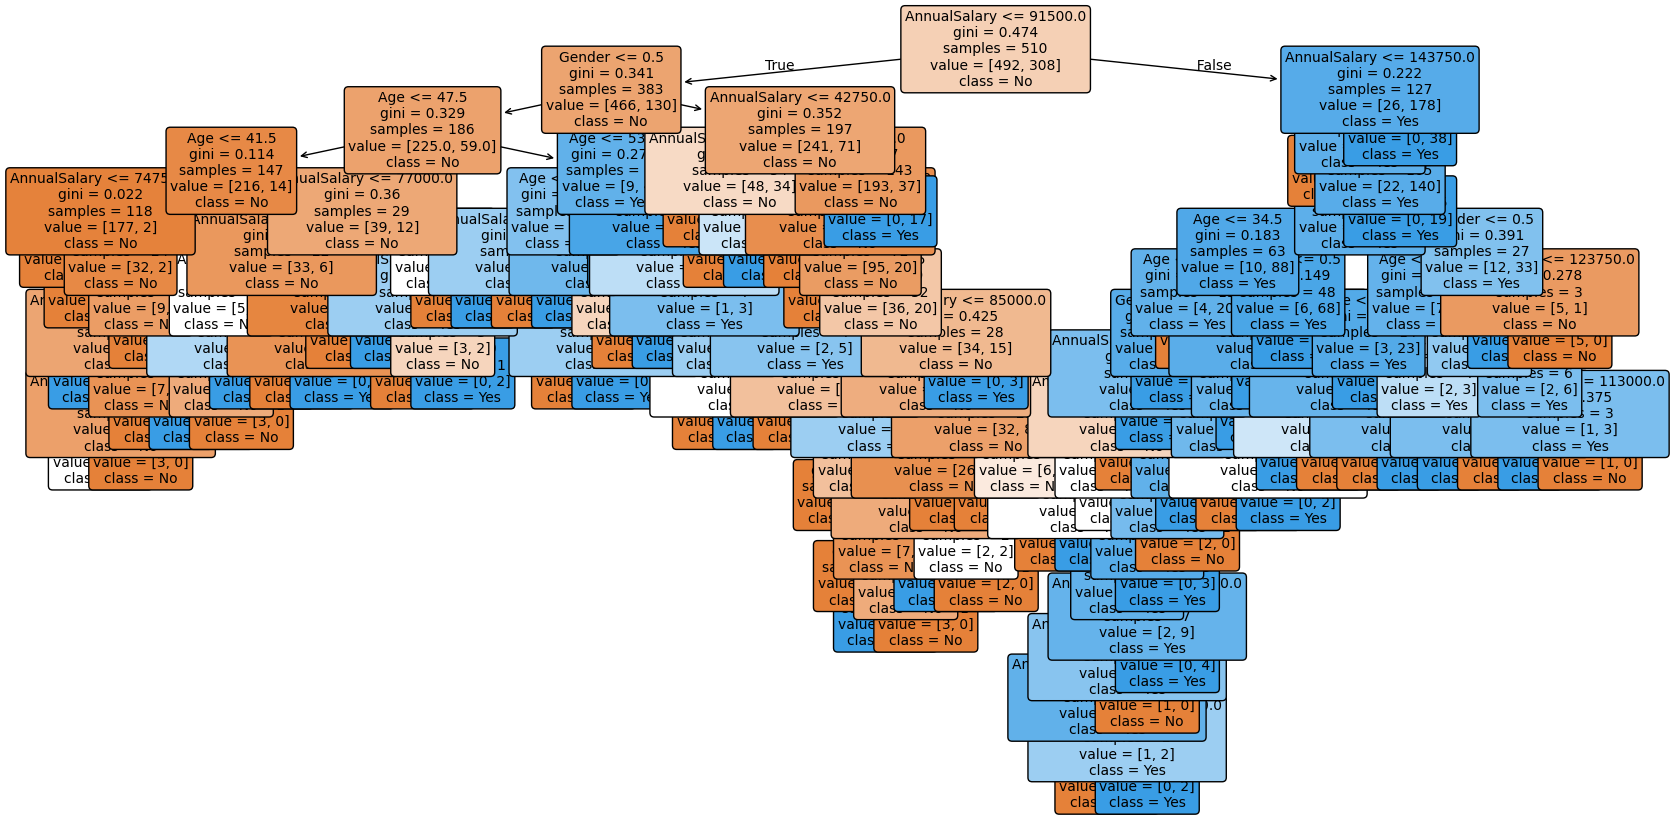

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

single_tree = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))  
plot_tree(single_tree, 
          feature_names=['Gender', 'Age', 'AnnualSalary'], 
          class_names=['No', 'Yes'],  # 'No' for 0, 'Yes' for 1
          filled=True, 
          rounded=True, 
          fontsize=10)

plt.show()
